# Employee Retention Analysis

## Business scenario and problem 

The HR department at Company X wants to take some initiatives to improve employee satisfaction levels at the company. They collected data from employees, but now they don’t know what to do with it. They have the following question: 

**What’s likely to make the employee leave the company?**

The goal of this project is to analyze the data collected by the HR department and to build a model that predicts whether or not an employee will leave the company. 

If we can predict employees likely to quit, it might be possible to identify factors that contribute to their leaving. Because it is time-consuming and expensive to find, interview, and hire new employees, increasing employee retention will be beneficial to the company.

Below are the variables for the dataset: 

Variable  |Description |
-----|-----| 
satisfaction_level|Employee-reported job satisfaction level [0&ndash;1]|
last_evaluation|Score of employee's last performance review [0&ndash;1]|
number_project|Number of projects employee contributes to|
average_monthly_hours|Average number of hours employee worked per month|
time_spend_company|How long the employee has been with the company (years)
Work_accident|Whether or not the employee experienced an accident while at work
left|Whether or not the employee left the company
promotion_last_5years|Whether or not the employee was promoted in the last 5 years
Department|The employee's department
salary|The employee's salary (U.S. dollars)

In [1]:
# For data manipulation
import pandas as pd 
import numpy as np 

# For data visualisation
import matplotlib.pyplot as plt 
import seaborn as sns 

# For metrics and helpful functions
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.tree import plot_tree
from sklearn.metrics import accuracy_score, precision_score, recall_score,\
f1_score, confusion_matrix, ConfusionMatrixDisplay, classification_report
from sklearn.metrics import roc_auc_score, roc_curve

# For data modeling
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from xgboost import XGBClassifier
from xgboost import XGBRegressor
from xgboost import plot_importance

# For saving models
import pickle

In [2]:
pd.set_option('display.max_columns', None)
df0 = pd.read_csv(r"HR_capstone_dataset.csv")

In [3]:
df0.head()

satisfaction_level  last_evaluation  number_project  average_montly_hours  \
0                0.38             0.53               2                   157   
1                0.80             0.86               5                   262   
2                0.11             0.88               7                   272   
3                0.72             0.87               5                   223   
4                0.37             0.52               2                   159   

   time_spend_company  Work_accident  left  promotion_last_5years Department  \
0                   3              0     1                      0      sales   
1                   6              0     1                      0      sales   
2                   4              0     1                      0      sales   
3                   5              0     1                      0      sales   
4                   3              0     1                      0      sales   

   salary  
0     low  
1  medium  
2  medium  
3     low  
4     low

In [4]:
df0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [5]:
df0.describe()

satisfaction_level  last_evaluation  number_project  \
count        14999.000000     14999.000000    14999.000000   
mean             0.612834         0.716102        3.803054   
std              0.248631         0.171169        1.232592   
min              0.090000         0.360000        2.000000   
25%              0.440000         0.560000        3.000000   
50%              0.640000         0.720000        4.000000   
75%              0.820000         0.870000        5.000000   
max              1.000000         1.000000        7.000000   

       average_montly_hours  time_spend_company  Work_accident          left  \
count          14999.000000        14999.000000   14999.000000  14999.000000   
mean             201.050337            3.498233       0.144610      0.238083   
std               49.943099            1.460136       0.351719      0.425924   
min               96.000000            2.000000       0.000000      0.000000   
25%              156.000000            3.000000       0.000000      0.000000   
50%              200.000000            3.000000       0.000000      0.000000   
75%              245.000000            4.000000       0.000000      0.000000   
max              310.000000           10.000000       1.000000      1.000000   

       promotion_last_5years  
count           14999.000000  
mean                0.021268  
std                 0.144281  
min                 0.000000  
25%                 0.000000  
50%                 0.000000  
75%                 0.000000  
max                 1.000000

In [6]:
df0.shape

(14999, 10)

In [7]:
# checking for missing values
df0.isnull().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
Department               0
salary                   0
dtype: int64

In [8]:
# Checking for duplicates 
df0.duplicated().sum()

3008

In [9]:
# Finding the percent of data that is duplicated
percent_duplicated = (df0.duplicated().sum()/df0.shape[0])*100
print('Percentage of dataset duplicated:', round(percent_duplicated, 2),'%')

Percentage of dataset duplicated: 20.05 %


In [10]:
# Inspecting the duplicated data
df0[df0.duplicated()].head()

satisfaction_level  last_evaluation  number_project  \
396                 0.46             0.57               2   
866                 0.41             0.46               2   
1317                0.37             0.51               2   
1368                0.41             0.52               2   
1461                0.42             0.53               2   

      average_montly_hours  time_spend_company  Work_accident  left  \
396                    139                   3              0     1   
866                    128                   3              0     1   
1317                   127                   3              0     1   
1368                   132                   3              0     1   
1461                   142                   3              0     1   

      promotion_last_5years  Department  salary  
396                       0       sales     low  
866                       0  accounting     low  
1317                      0       sales  medium  
1368                      0       RandD     low  
1461                      0       sales     low

Based on judgement, it is highly unlikely that there are multiple employees that correspond exactly to the metrics in the df. Therefore, we will drop them. 

In [11]:
df1 = df0.drop_duplicates(keep = 'first')
df1.shape

(11991, 10)

In [12]:
# There are errors in the column names and we could do a better job at renaming them 

df1 = df1.rename(columns = {'number_project' : 'num_project',
       'average_montly_hours' : 'avg_monthly_hours', 'time_spend_company' : 'tenure', 'Work_accident' : 'work_accident',
       'promotion_last_5years' : 'promo_last_5yrs', 'Department' : 'dept'})

In [13]:
df1.head()

satisfaction_level  last_evaluation  num_project  avg_monthly_hours  \
0                0.38             0.53            2                157   
1                0.80             0.86            5                262   
2                0.11             0.88            7                272   
3                0.72             0.87            5                223   
4                0.37             0.52            2                159   

   tenure  work_accident  left  promo_last_5yrs   dept  salary  
0       3              0     1                0  sales     low  
1       6              0     1                0  sales  medium  
2       4              0     1                0  sales  medium  
3       5              0     1                0  sales     low  
4       3              0     1                0  sales     low

In [14]:
df1.describe()

satisfaction_level  last_evaluation   num_project  avg_monthly_hours  \
count        11991.000000     11991.000000  11991.000000       11991.000000   
mean             0.629658         0.716683      3.802852         200.473522   
std              0.241070         0.168343      1.163238          48.727813   
min              0.090000         0.360000      2.000000          96.000000   
25%              0.480000         0.570000      3.000000         157.000000   
50%              0.660000         0.720000      4.000000         200.000000   
75%              0.820000         0.860000      5.000000         243.000000   
max              1.000000         1.000000      7.000000         310.000000   

             tenure  work_accident          left  promo_last_5yrs  
count  11991.000000   11991.000000  11991.000000     11991.000000  
mean       3.364857       0.154282      0.166041         0.016929  
std        1.330240       0.361234      0.372133         0.129012  
min        2.000000       0.000000      0.000000         0.000000  
25%        3.000000       0.000000      0.000000         0.000000  
50%        3.000000       0.000000      0.000000         0.000000  
75%        4.000000       0.000000      0.000000         0.000000  
max       10.000000       1.000000      1.000000         1.000000

Column: tenure
Lower limit: 1.5
Upper limit: 5.5
Number of outliers: 824


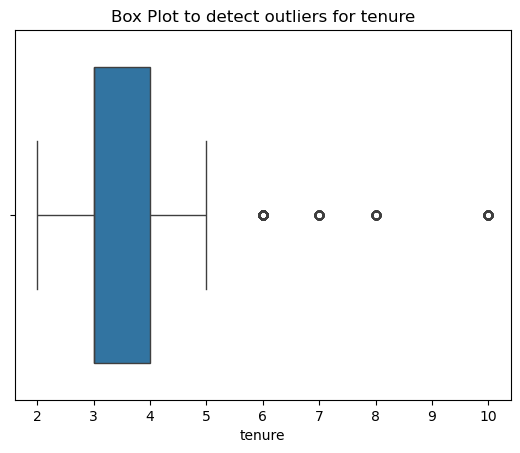

In [15]:
# Identifying outliers in the data 

# I want to identify outliers for relevant columns. 

columns_to_exclude = ['work_accident', 'left', 'promo_last_5yrs']

def detect_outliers(df1, column):
    Q1 = df1[column].quantile(0.25)
    Q3 = df1[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_limit = Q1 - 1.5 * IQR
    upper_limit = Q3 + 1.5 * IQR
    outliers = df1[(df1[column] < lower_limit) | (df1[column] > upper_limit)]
    return lower_limit, upper_limit, outliers 

columns_to_plot = []

for column in df1.columns:
    if pd.api.types.is_numeric_dtype(df1[column]) and column not in columns_to_exclude: 
        lower_limit, upper_limit, outliers = detect_outliers(df1, column)       
        if len(outliers) > 0:
            print(f"Column: {column}")
            print(f"Lower limit: {lower_limit}")
            print(f"Upper limit: {upper_limit}")
            print(f"Number of outliers: {len(outliers)}") 
            columns_to_plot.append(column)
            
for i, column in enumerate(columns_to_plot, 1):
    plt.subplot(len(columns_to_plot), 1, i)
    sns.boxplot(data=df1, x=column)
    plt.title(f'Box Plot to detect outliers for {column}')
    plt.xlabel(column)   
    plt.show()

In [16]:
# Understanding how many employees left and what percentage of all employees the figures it represents 
print(df1['left'].value_counts())
print()
print(df1['left'].value_counts(normalize = True))

left
0    10000
1     1991
Name: count, dtype: int64

left
0    0.833959
1    0.166041
Name: proportion, dtype: float64


### Examaning variables of interest and visualising the data 

Creating stacked box plots and histograms showing the `avg_monthly_hours`distributions for `num_project`,~ comparing the distirbutions of employees that stayed versus those who left

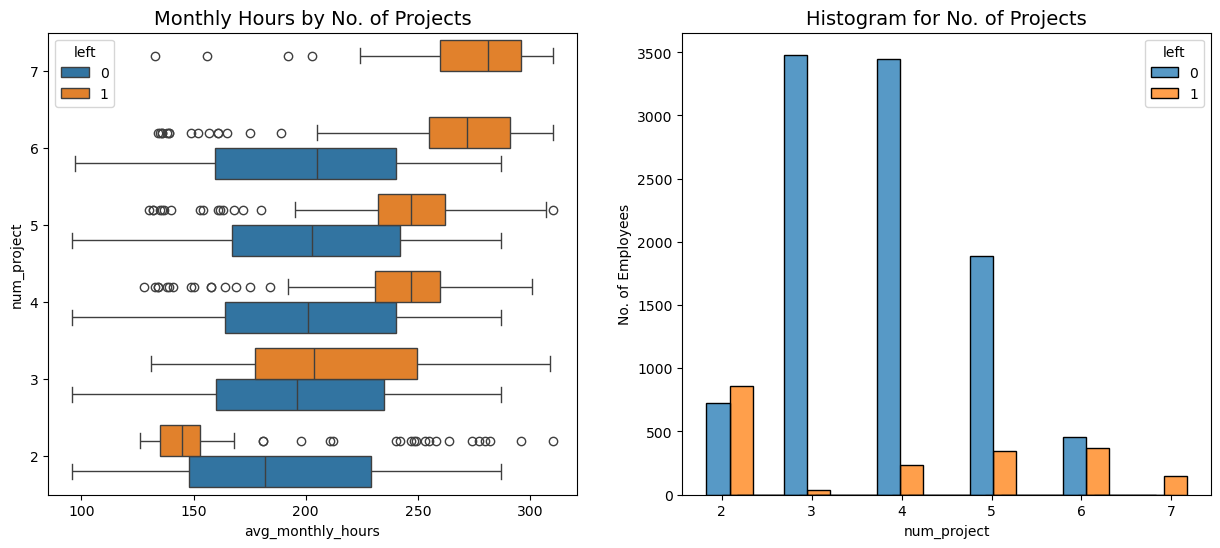

In [17]:
#Creating the stacked boxplots 

fig, axs = plt.subplots(1, 2, figsize = (15,6))


sns.boxplot(data = df1, x = df1['avg_monthly_hours'], y = df1['num_project'], hue = 'left', orient = 'h', ax = axs[0])
axs[0].invert_yaxis()
axs[0].set_title('Monthly Hours by No. of Projects', fontsize = '14')


sns.histplot(data = df1, x='num_project', hue = 'left', multiple = 'dodge', shrink = 3, ax = axs[1])
axs[1].set_title('Histogram for No. of Projects', fontsize = '14')
axs[1].set_ylabel('No. of Employees')
plt.show()

It would be natural that the employees who work on more projects would also be working longer hours. This seems to be the case here, with the mean hours of employees both who stay and have left are increasing with the number of projects worked. However, a few things stand out:

1. There are two groups of employees who left the company: (A), those who worked considerably less than their peers with the same number of projects, and (B), those who worked much more. Of those in group A, it is possible that they were layed off. It is also possible that they had already given their notive and were asssigned fewer hours as a result. For those in group B, it's reasonable to infer that they probably quit. Those in group B likely contributed a lot to the projects they worked in; they might have been the largest contributors to their projects.
2. Everyone with seven projects left the company, and the interquartile ranges of this group and those who left with six projects was ~255–295 hours/month—much more than any other group.
3. The optimal number of projects for employees to work on seems to be 3–4. The ratio of left/stayed is very small for these cohorts.
4.  If we assume a work week of 40 hours and two weeks of vacation per year, then the average number of working hours per month of employees working Monday&ndash;Friday `= 50 weeks * 40 hours per week / 12 months = 166.67 hours per month`. This means that, aside from the employees who worked on two projects, every group&mdash;even those who didn't leave the company&mdash;worked considerably more hours than this. It seems that employees here are overworked.

Exploring the`avg_monthly_hours` and the `satisfaction_level`

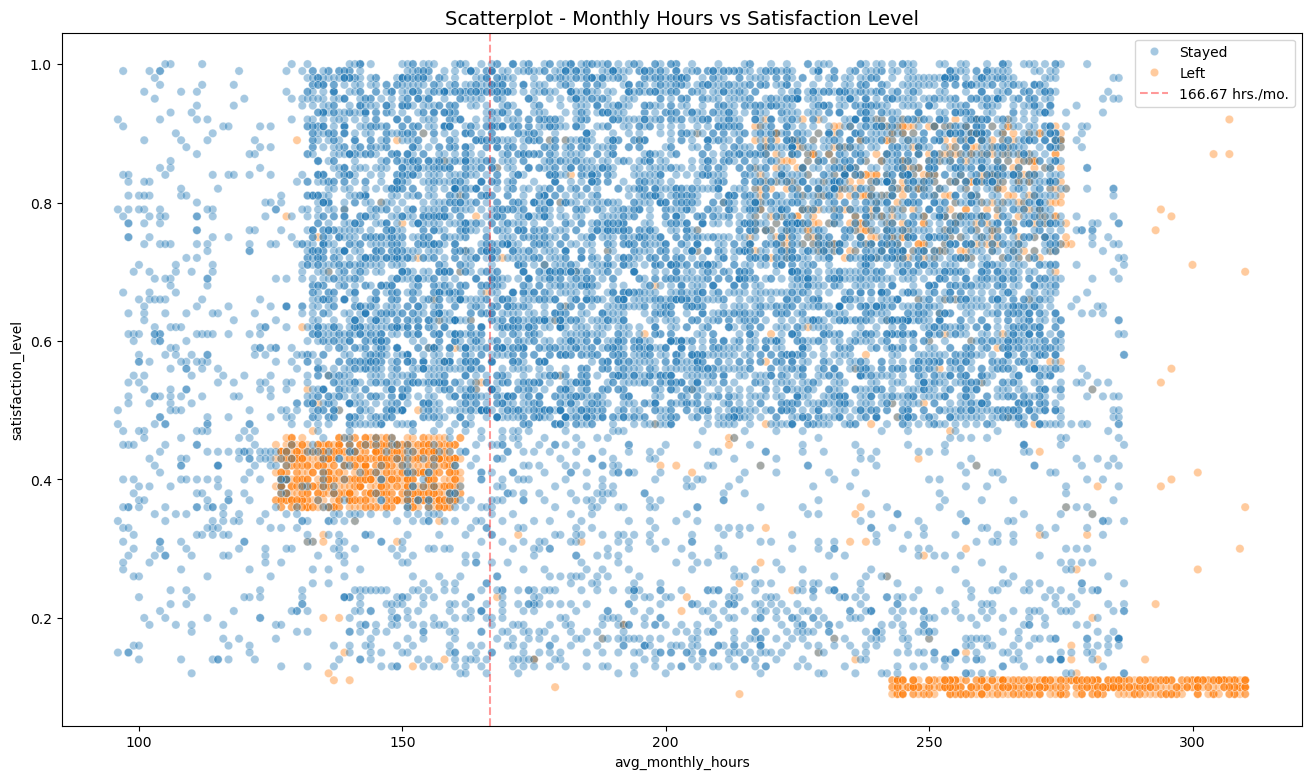

In [18]:
# Creating a scatterplot to visualise the data based on employee leaving status 
plt.figure(figsize=(16, 9))
sns.scatterplot(data=df1, x='avg_monthly_hours', y='satisfaction_level', hue='left', alpha=0.4)
plt.title('Scatterplot - Monthly Hours vs Satisfaction Level', fontsize='14')

line = plt.axvline(x=166.67, color='red', alpha = 0.4, ls='--')

handles, labels = plt.gca().get_legend_handles_labels()
handles.append(line)
plt.legend(handles = handles, labels = ['Stayed', 'Left', '166.67 hrs./mo.'])

plt.show();

The scatterplot above shows that there was a sizeable group of employees who worked ~240&ndash;315 hours per month. 315 hours per month is over 75 hours per week for a whole year. It's likely this is related to their satisfaction levels being close to zero. 

The plot also shows another group of people who left, those who had more normal working hours. Even so, their satisfaction was only around 0.4. It's difficult to speculate about why they might have left. It's possible they felt pressured to work more, considering so many of their peers worked more, and that pressure could have lowered their satisfaction levels. 


Furthermore, based on the previous graphing where we compared the number of projects and monthly average hours, we can see that the cluster to the left appears to be employees taking on fewer projects, and the clusters to the right, the employees taking on 6 or 7 projects.  

Finally, there is a group who worked ~210&ndash;280 hours per month, and they had satisfaction levels ranging ~0.7&ndash;0.9. 

Note the strange shape of the distributions here. This is indicative of data manipulation or synthetic data.

For the next visualization, it might be interesting to visualize satisfaction levels by tenure.

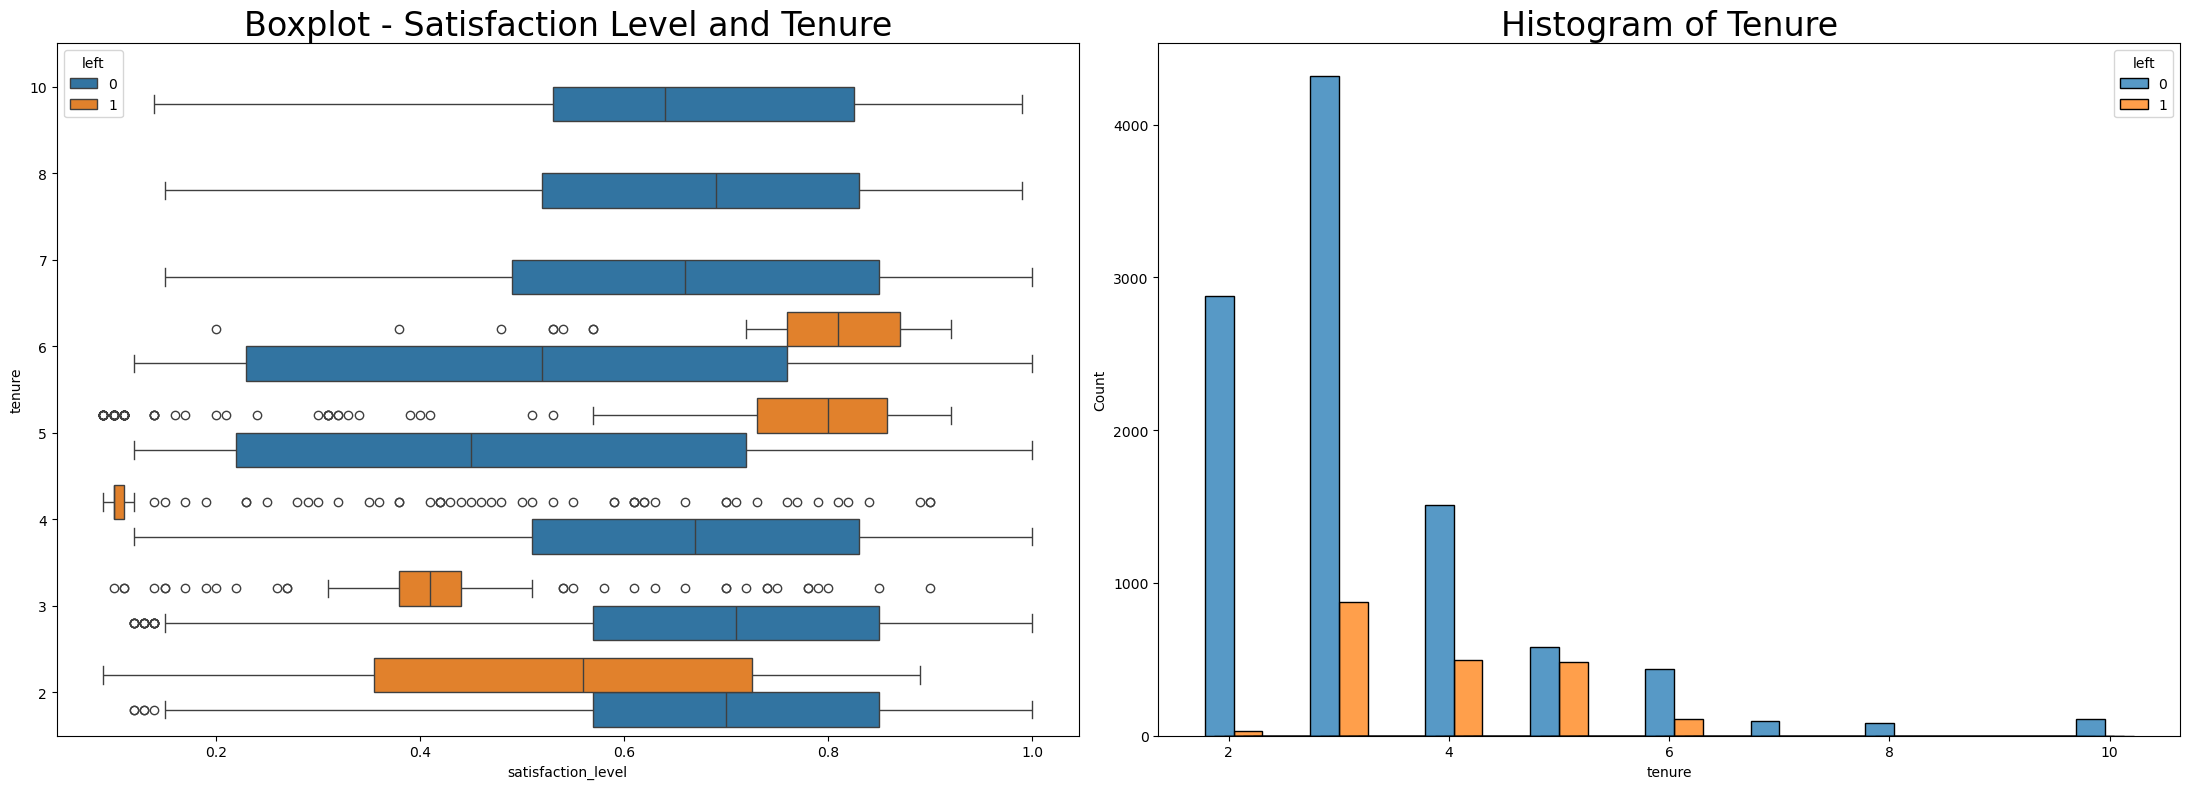

In [19]:
# Creating stacked barchart and histogram 

fig, axs = plt.subplots(1, 2, figsize = (22,8))

sns.boxplot(data = df1, y = 'tenure', x = 'satisfaction_level', orient = 'h', hue = 'left', ax = axs[0])
axs[0].set_title('Boxplot - Satisfaction Level and Tenure', fontsize = 24)
axs[0].invert_yaxis()

sns.histplot(data = df1, x = 'tenure', hue =  'left', ax = axs[1], multiple = 'dodge', shrink = 6)
axs[1].set_title('Histogram of Tenure',  fontsize = 24)

plt.tight_layout()
plt.show()

There are many observations you could make from this plot.
- Employees who left fall into two general categories: dissatisfied employees with shorter tenures and very satisfied employees with medium-length tenures.
- Four-year employees who left seem to have an unusually low satisfaction level. It's worth investigating changes to company policy that might have affected people specifically at the four-year mark, if possible. 
- The longest-tenured employees didn't leave. Their satisfaction levels aligned with those of newer employees who stayed. 
- The histogram shows that there are relatively few longer-tenured employees. It's possible that they're the higher-ranking, higher-paid employees.

Calculating the mean and median satisfaction scores of employees who left and those who didn't.

In [20]:
df1.groupby(['left'])['satisfaction_level'].agg(['mean', 'median'])

mean  median
left                  
0     0.667365    0.69
1     0.440271    0.41

As expected, the mean and median satisfaction scores of employees who left are lower than those of employees who stayed. Interestingly, among employees who stayed, the mean satisfaction score appears to be slightly below the median score. This indicates that satisfaction levels among those who stayed might be skewed to the left.

Examining the salary levels to different tenures 

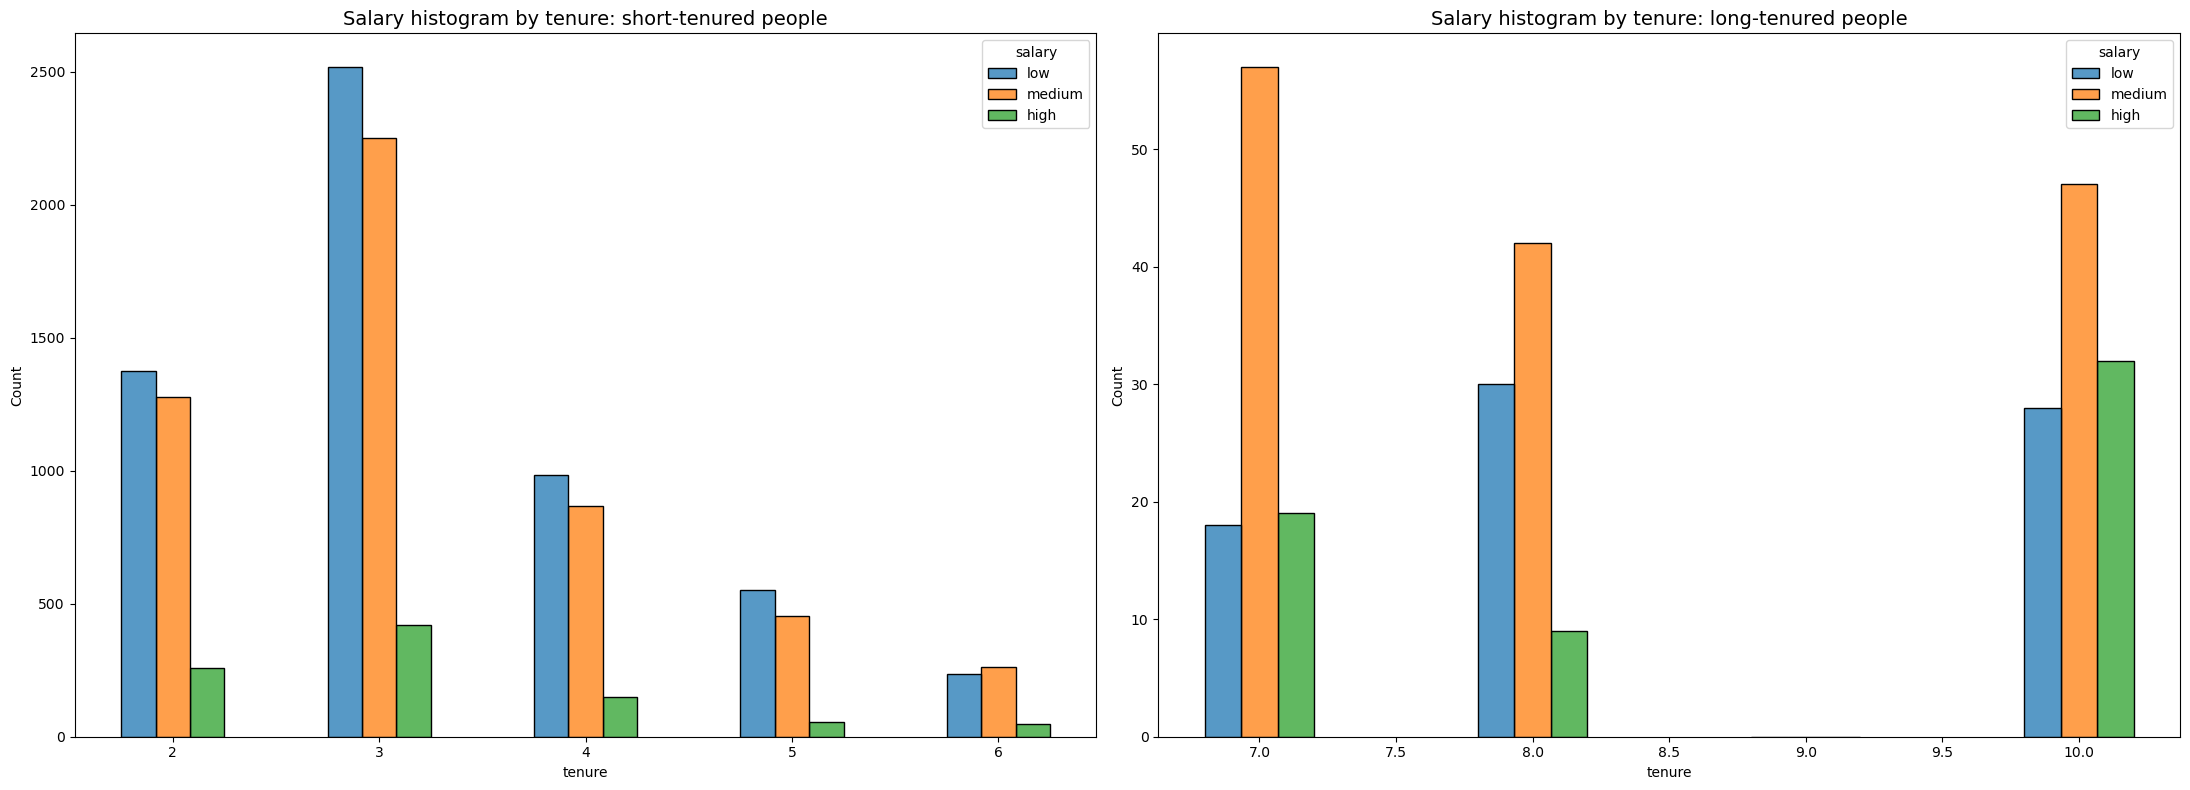

In [21]:
fig, axs = plt.subplots(1, 2, figsize = (22,8))

# Define short-tenured employees
tenure_short = df1[df1['tenure'] < 7]

# Define long-tenured employees
tenure_long = df1[df1['tenure'] > 6]

# Plot short-tenured histogram
sns.histplot(data=tenure_short, x='tenure', hue='salary', discrete=1, 
             hue_order=['low', 'medium', 'high'], multiple='dodge', shrink=.5, ax=axs[0])
axs[0].set_title('Salary histogram by tenure: short-tenured people', fontsize='14')

# Plot long-tenured histogram
sns.histplot(data=tenure_long, x='tenure', hue='salary', discrete=1, 
             hue_order=['low', 'medium', 'high'], multiple='dodge', shrink=.4, ax=axs[1])
axs[1].set_title('Salary histogram by tenure: long-tenured people', fontsize='14')


plt.tight_layout();

The plots above show that long-tenured employees were not disproportionately comprised of higher-paid employees. 

This means that long-tenured employees (those who have been with the company for a long time) are not more or less likely to be in higher salary categories compared to shorter-tenured employees. There is no strong bias or skewness in the distribution of salaries based on tenure.

Exploring whether there is a correlation betyween working long hours and recieving high evaluations scores 

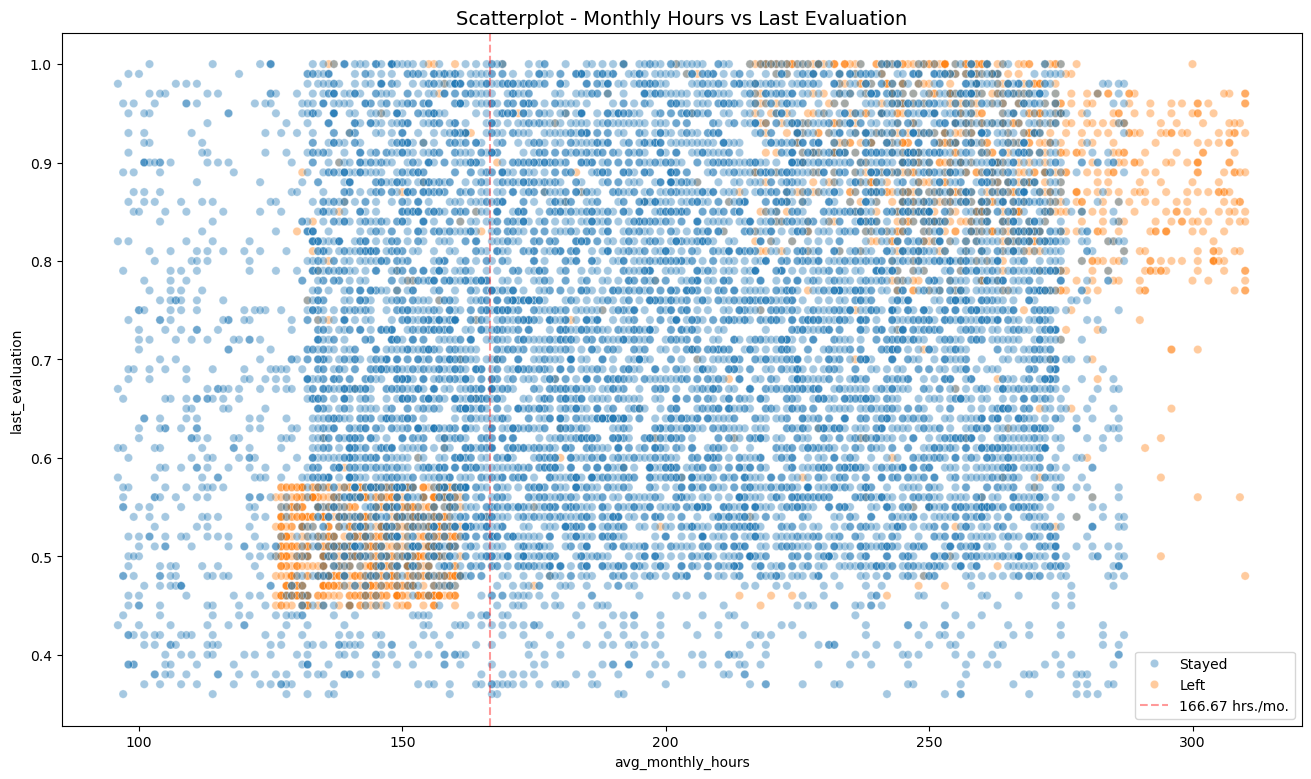

In [22]:
# Creating a scatterplot to visualise the data based on employee leaving status 
plt.figure(figsize=(16, 9))
sns.scatterplot(data=df1, x='avg_monthly_hours', y='last_evaluation', hue='left', alpha=0.4)
plt.title('Scatterplot - Monthly Hours vs Last Evaluation', fontsize='14')

line = plt.axvline(x=166.67, color='red', alpha = 0.4, ls='--')

handles, labels = plt.gca().get_legend_handles_labels()
handles.append(line)
plt.legend(handles = handles, labels = ['Stayed', 'Left', '166.67 hrs./mo.'])

plt.show();

The following observations can be made from the scatterplot above:
- The scatterplot indicates two groups of employees who left: overworked employees who performed very well and employees who worked slightly under the nominal monthly average of 166.67 hours with lower evaluation scores. 
- There seems to be a correlation between hours worked and evaluation score. 
- There isn't a high percentage of employees in the upper left quadrant of this plot; but working long hours doesn't guarantee a good evaluation score.
- Most of the employees in this company work well over 167 hours per month.

Exploring whether employees who worked very long hours were promoted in the last five years

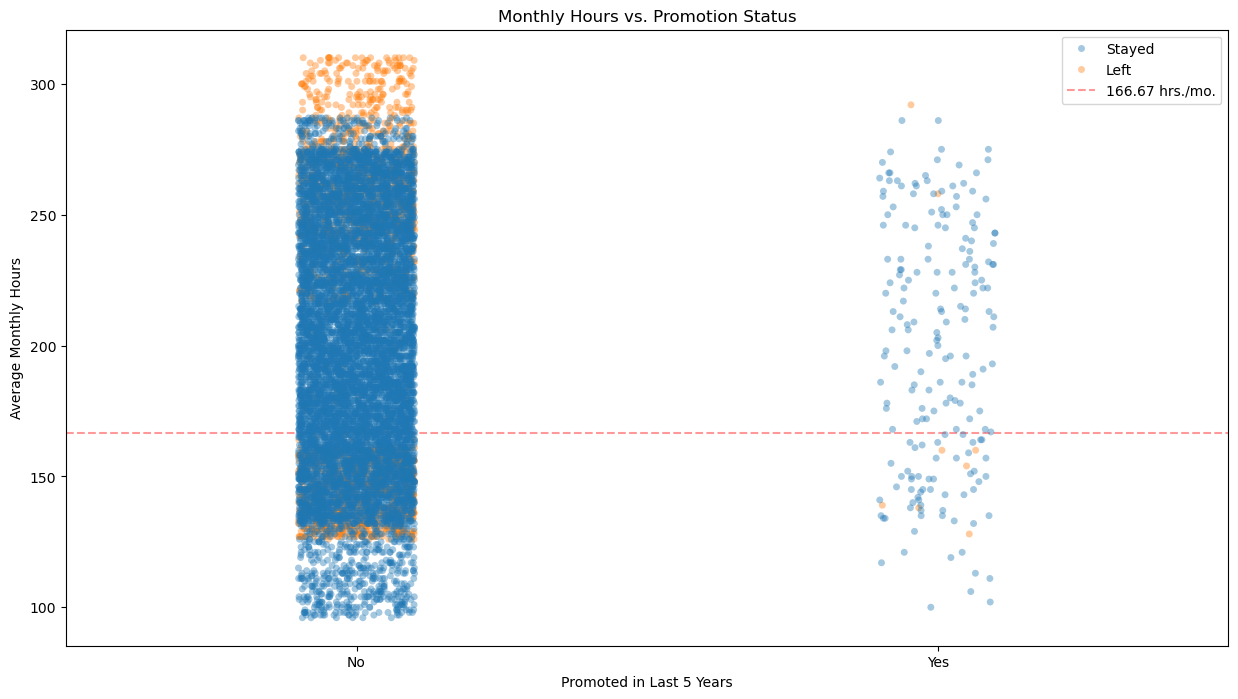

In [23]:
plt.figure(figsize=(15, 8))
sns.stripplot(data=df1, x='promo_last_5yrs', y='avg_monthly_hours', hue = 'left', jitter=True, alpha=0.4)
line = plt.axhline(y=166.67, color='red', ls='--', alpha=0.4)
plt.title('Monthly Hours vs. Promotion Status')
plt.xlabel('Promoted in Last 5 Years')
plt.ylabel('Average Monthly Hours')
plt.xticks([0, 1], ['No', 'Yes'])

handles, labels = plt.gca().get_legend_handles_labels()
handles.append(line)
plt.legend(handles = handles, labels = ['Stayed', 'Left', '166.67 hrs./mo.'])

plt.show()

The plot above shows the following:
- very few employees who were promoted in the last five years left
- very few employees who worked the most hours were promoted
- all of the employees who left were working the longest hours  

Inspecting how the employees who left are distributed across departments

In [24]:
df1['dept'].value_counts()

dept
sales          3239
technical      2244
support        1821
IT              976
RandD           694
product_mng     686
marketing       673
accounting      621
hr              601
management      436
Name: count, dtype: int64

In [25]:
dept = df1.groupby('left')['dept'].value_counts().unstack()
dept.loc['Total'] = dept.sum()
dept['Total'] = dept.sum(axis =1)
dept.rename(index = {0: 'Stayed', 1: 'Left'}, inplace = True)
dept

dept     IT  RandD  accounting   hr  management  marketing  product_mng  \
left                                                                      
Stayed  818    609         512  488         384        561          576   
Left    158     85         109  113          52        112          110   
Total   976    694         621  601         436        673          686   

dept    sales  support  technical  Total  
left                                      
Stayed   2689     1509       1854  10000  
Left      550      312        390   1991  
Total    3239     1821       2244  11991

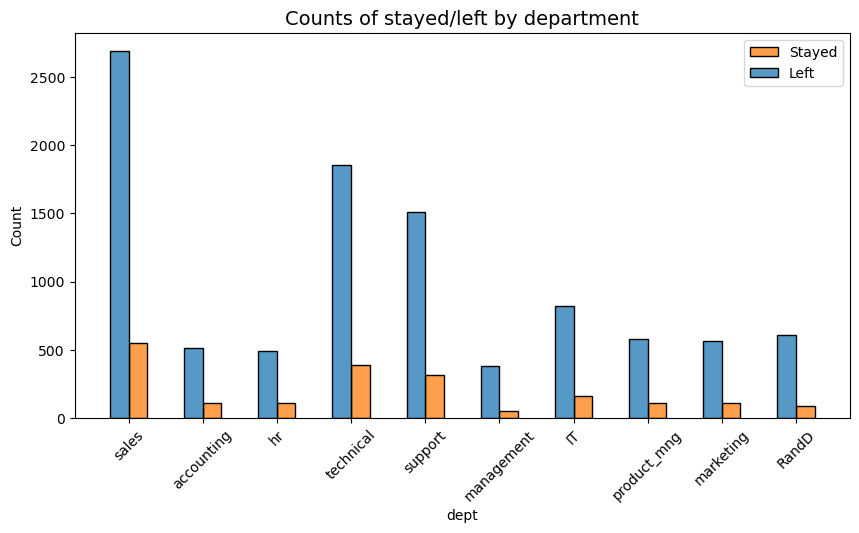

In [26]:
plt.figure(figsize = (10,5))
sns.histplot(data = df1, x = 'dept', hue = 'left', multiple = 'dodge', discrete = 1, shrink = 0.5, hue_order = [0,1])
plt.legend(['Stayed', 'Left'])
plt.title('Counts of stayed/left by department', fontsize=14)
plt.xticks(rotation = 45)
plt.show();

There doesn't seem to be any department that differs significantly in its proportion of employees who left to those who stayed.

Checking for any correlations between variables in the data 

In [27]:
df2 = df1.drop(columns = ['dept', 'salary'])
corr = df2.corr()
corr

satisfaction_level  last_evaluation  num_project  \
satisfaction_level            1.000000         0.095186    -0.133246   
last_evaluation               0.095186         1.000000     0.270256   
num_project                  -0.133246         0.270256     1.000000   
avg_monthly_hours            -0.006252         0.264678     0.331516   
tenure                       -0.152915         0.096829     0.188837   
work_accident                 0.039940        -0.005695    -0.005612   
left                         -0.350558         0.013520     0.030928   
promo_last_5yrs               0.019789        -0.007206    -0.000544   

                    avg_monthly_hours    tenure  work_accident      left  \
satisfaction_level          -0.006252 -0.152915       0.039940 -0.350558   
last_evaluation              0.264678  0.096829      -0.005695  0.013520   
num_project                  0.331516  0.188837      -0.005612  0.030928   
avg_monthly_hours            1.000000  0.102875      -0.012860  0.070409   
tenure                       0.102875  1.000000       0.000003  0.173295   
work_accident               -0.012860  0.000003       1.000000 -0.125436   
left                         0.070409  0.173295      -0.125436  1.000000   
promo_last_5yrs             -0.004964  0.056828       0.029852 -0.044657   

                    promo_last_5yrs  
satisfaction_level         0.019789  
last_evaluation           -0.007206  
num_project               -0.000544  
avg_monthly_hours         -0.004964  
tenure                     0.056828  
work_accident              0.029852  
left                      -0.044657  
promo_last_5yrs            1.000000

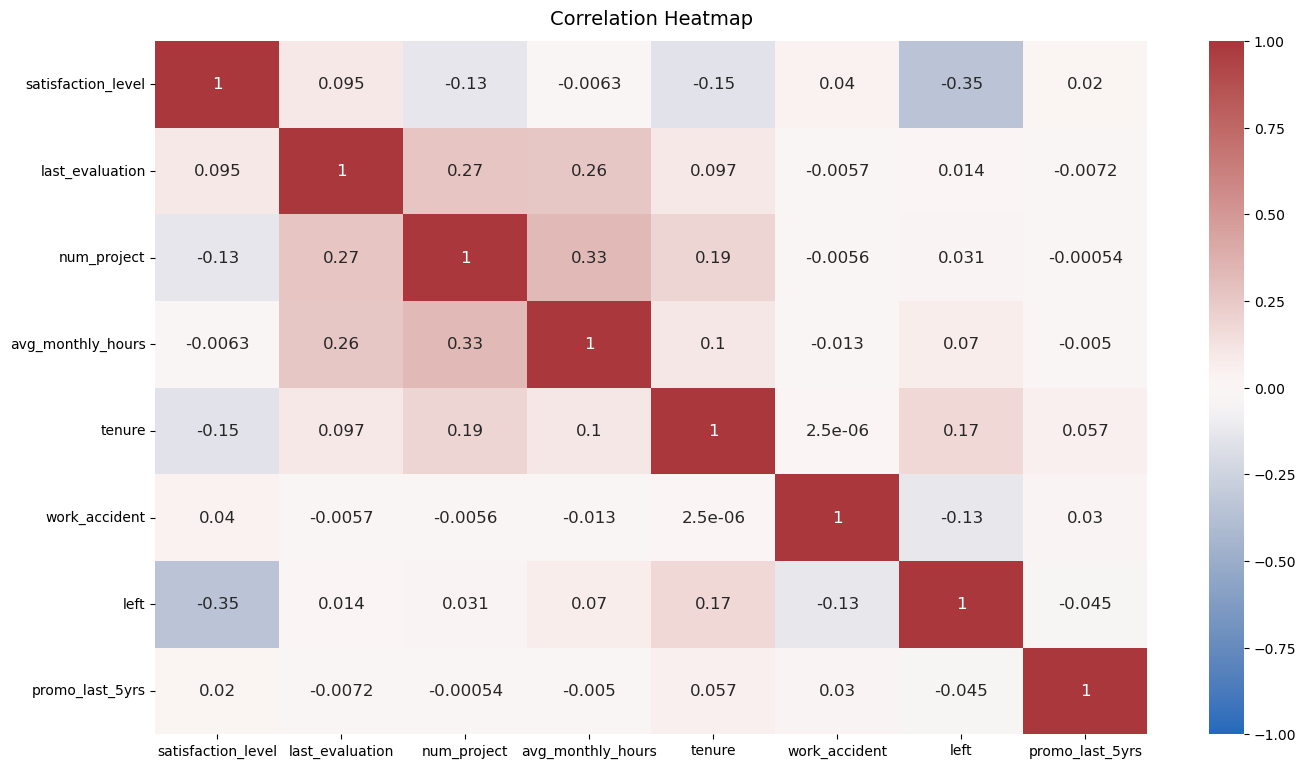

In [28]:
plt.figure(figsize = (16,9))
heatmap = sns.heatmap(corr, annot=True, vmin = -1, vmax =1, cmap=sns.color_palette("vlag", as_cmap = True),annot_kws={"size": 12})
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':14}, pad=12);

The correlation heatmap confirms that the number of projects, monthly hours, and evaluation scores all have some positive correlation with each other, and whether an employee leaves is negatively correlated with their satisfaction level.

**Insights** 

It appears that employees are leaving the company as a result of poor management. Leaving is tied to longer working hours, many projects, and generally lower satisfaction levels. It can be ungratifying to work long hours and not receive promotions or good evaluation scores. There's a sizeable group of employees at this company who are probably burned out. It also appears that if an employee has spent more than six years at the company, they tend not to leave. 

### Model Building 

Since the variable we want to predict (whether an employee leaves the company) is categorical, we could either build a Logistic Regression model, or a Tree-based Machine Learning model.

### Modeling Approach A: Logistic Regression Model

Both `dept` and `salary` are categorical variables. We can use `OneHotEncoder` for `dept`. `sales` is ordinal, where there's a heirachy to the categories, so we can convert the levels to numbers using `OrdinalEncoder` 

In [29]:
df_enc = df1.copy()

In [30]:
# Ordinal encoder for salary
salary = ['low', 'medium', 'high']
enc = OrdinalEncoder(categories = [salary])
df_enc['salary'] = enc.fit_transform(df_enc[['salary']])

# OneHotEncoder for department 
ohe = OneHotEncoder(handle_unknown = 'ignore', sparse_output = False).set_output(transform = 'pandas')
ohetransform = ohe.fit_transform(df_enc[['dept']])
df_enc = pd.concat([df_enc, ohetransform], axis = 1).drop(columns = ['dept'])
df_enc.head()


df_enc.head()

satisfaction_level  last_evaluation  num_project  avg_monthly_hours  \
0                0.38             0.53            2                157   
1                0.80             0.86            5                262   
2                0.11             0.88            7                272   
3                0.72             0.87            5                223   
4                0.37             0.52            2                159   

   tenure  work_accident  left  promo_last_5yrs  salary  dept_IT  dept_RandD  \
0       3              0     1                0     0.0      0.0         0.0   
1       6              0     1                0     1.0      0.0         0.0   
2       4              0     1                0     1.0      0.0         0.0   
3       5              0     1                0     0.0      0.0         0.0   
4       3              0     1                0     0.0      0.0         0.0   

   dept_accounting  dept_hr  dept_management  dept_marketing  \
0              0.0      0.0              0.0             0.0   
1              0.0      0.0              0.0             0.0   
2              0.0      0.0              0.0             0.0   
3              0.0      0.0              0.0             0.0   
4              0.0      0.0              0.0             0.0   

   dept_product_mng  dept_sales  dept_support  dept_technical  
0               0.0         1.0           0.0             0.0  
1               0.0         1.0           0.0             0.0  
2               0.0         1.0           0.0             0.0  
3               0.0         1.0           0.0             0.0  
4               0.0         1.0           0.0             0.0

Since logistic regression is quite sesitive to outliers, we will remove outliers in the `tenure` column that we identified earlier.

In [31]:
# Selecting the rows in tenure that are not outliers and assigning it to a new variable
df_logreg = df_enc[(df_enc['tenure'] >= lower_limit) & (df_enc['tenure'] <= upper_limit)]
df_logreg.head()

satisfaction_level  last_evaluation  num_project  avg_monthly_hours  \
0                0.38             0.53            2                157   
2                0.11             0.88            7                272   
3                0.72             0.87            5                223   
4                0.37             0.52            2                159   
5                0.41             0.50            2                153   

   tenure  work_accident  left  promo_last_5yrs  salary  dept_IT  dept_RandD  \
0       3              0     1                0     0.0      0.0         0.0   
2       4              0     1                0     1.0      0.0         0.0   
3       5              0     1                0     0.0      0.0         0.0   
4       3              0     1                0     0.0      0.0         0.0   
5       3              0     1                0     0.0      0.0         0.0   

   dept_accounting  dept_hr  dept_management  dept_marketing  \
0              0.0      0.0              0.0             0.0   
2              0.0      0.0              0.0             0.0   
3              0.0      0.0              0.0             0.0   
4              0.0      0.0              0.0             0.0   
5              0.0      0.0              0.0             0.0   

   dept_product_mng  dept_sales  dept_support  dept_technical  
0               0.0         1.0           0.0             0.0  
2               0.0         1.0           0.0             0.0  
3               0.0         1.0           0.0             0.0  
4               0.0         1.0           0.0             0.0  
5               0.0         1.0           0.0             0.0

In [32]:
# Left is the variable we want the model to predict
y = df_logreg['left']
X = df_logreg.drop('left', axis = 1)

In [33]:
df_logreg['left'].value_counts(normalize = True)
#since the class is imbalanced we would want to use stratify = y when we model

left
0    0.831468
1    0.168532
Name: proportion, dtype: float64

There is an approximately 83%-17% split. So the data is not perfectly balanced, but it is not too imbalanced. If it was more severely imbalanced, we might want to resample the data to make it more balanced. In this case, we will use the data without modifying the class balance and continue evaluating the model.

In [34]:
# Splitting the data in training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y, test_size = 0.25, random_state = 42)

# Constructing a logistic regression model and fitting it to the training dataset 
log_clf = LogisticRegression(random_state = 42, max_iter = 500).fit(X_train, y_train)

# Using the logstic regression model to get predicitons on the test set 
y_pred  = log_clf.predict(X_test)

In [35]:
# Creating a classification report for the logistic regression model 
target_names = ['Predicted - Not Leave', 'Predicted - Leave']
print(classification_report(y_test, y_pred, target_names = target_names))

                       precision    recall  f1-score   support

Predicted - Not Leave       0.86      0.93      0.90      2321
    Predicted - Leave       0.44      0.26      0.33       471

             accuracy                           0.82      2792
            macro avg       0.65      0.60      0.61      2792
         weighted avg       0.79      0.82      0.80      2792



The classification report above shows that the logistic regression model achieved a precision of 79%, recall of 82%, f1-score of 80% (all weighted averages), and accuracy of 82%. However, if it's most important to predict employees who leave, then the scores are significantly lower.

Creating a confusion matrix to visualise the results of the logistic regression model

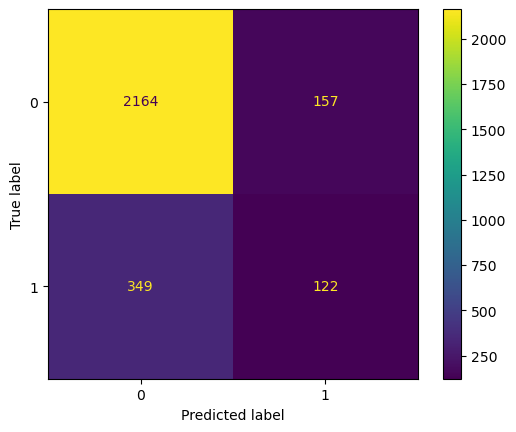

In [36]:
# Compute values for confusion matrix
log_cm = confusion_matrix(y_test, y_pred, labels=log_clf.classes_)

# Create display of confusion matrix
log_disp = ConfusionMatrixDisplay(confusion_matrix=log_cm, 
                                  display_labels=log_clf.classes_)

# Plot confusion matrix
log_disp.plot(values_format='')

# Display plot
plt.show()

* The upper-left quadrant displays the number of true negatives.
* The upper-right quadrant displays the number of false positives.
* The bottom-left quadrant displays the number of false negatives.
* The bottom-right quadrant displays the number of true positives.

True negatives: The number of people who did not leave that the model accurately predicted did not leave.

False positives: The number of people who did not leave the model inaccurately predicted as leaving.

False negatives: The number of people who left that the model inaccurately predicted did not leave

True positives: The number of people who left the model accurately predicted as leaving

A perfect model would yield all true negatives and true positives, and no false negatives or false positives.

### Modeling Approach B: Tree-based Model
This approach covers implementation of Decision Tree and Random Forest. 

In [37]:
# Left is the variable we want the model to predict
y = df_enc['left']
X = df_enc.drop('left', axis =1)

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y, test_size = 0.25, random_state = 42)

In [38]:
X.head()

satisfaction_level  last_evaluation  num_project  avg_monthly_hours  \
0                0.38             0.53            2                157   
1                0.80             0.86            5                262   
2                0.11             0.88            7                272   
3                0.72             0.87            5                223   
4                0.37             0.52            2                159   

   tenure  work_accident  promo_last_5yrs  salary  dept_IT  dept_RandD  \
0       3              0                0     0.0      0.0         0.0   
1       6              0                0     1.0      0.0         0.0   
2       4              0                0     1.0      0.0         0.0   
3       5              0                0     0.0      0.0         0.0   
4       3              0                0     0.0      0.0         0.0   

   dept_accounting  dept_hr  dept_management  dept_marketing  \
0              0.0      0.0              0.0             0.0   
1              0.0      0.0              0.0             0.0   
2              0.0      0.0              0.0             0.0   
3              0.0      0.0              0.0             0.0   
4              0.0      0.0              0.0             0.0   

   dept_product_mng  dept_sales  dept_support  dept_technical  
0               0.0         1.0           0.0             0.0  
1               0.0         1.0           0.0             0.0  
2               0.0         1.0           0.0             0.0  
3               0.0         1.0           0.0             0.0  
4               0.0         1.0           0.0             0.0

**Decision Tree - Round 1**

In [39]:
# Instantiate model
tree = DecisionTreeClassifier(random_state=42)

# Assign a dictionary of hyperparameters to search over
cv_params = {'max_depth':[4, 6, 8, None],
             'min_samples_leaf': [2, 5, 1],
             'min_samples_split': [2, 4, 6]
             }

# Assign a dictionary of scoring metrics to capture
scoring = {'accuracy', 'precision', 'recall', 'f1', 'roc_auc'}

# Instantiate GridSearch
tree1 = GridSearchCV(tree, cv_params, scoring=scoring, cv=4, refit='roc_auc')

In [40]:
%%time 

tree1.fit(X_train, y_train)

CPU times: total: 1.16 s
Wall time: 1.94 s


GridSearchCV(cv=4, estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'max_depth': [4, 6, 8, None],
                         'min_samples_leaf': [2, 5, 1],
                         'min_samples_split': [2, 4, 6]},
             refit='roc_auc',
             scoring={'recall', 'roc_auc', 'precision', 'accuracy', 'f1'})

In [41]:
# Checking best parameters
tree1.best_params_

{'max_depth': 6, 'min_samples_leaf': 2, 'min_samples_split': 6}

In [42]:
# Checking best AUC score on CV
tree1.best_score_

0.9758952535925409

This is a strong AUC score, which shows that this model can predict employees who leave very well 

In [43]:
def make_results(model_name:str, model_object, metric:str):
    '''
    Arguments:
        model_name (string): what you want the model to be called in the output table
        model_object: a fit GridSearchCV object
        metric (string): precision, recall, f1, accuracy, or auc
  
    Returns a pandas df with the F1, recall, precision, accuracy, and auc scores
    for the model with the best mean 'metric' score across all validation folds.  
    '''

    # Create dictionary that maps input metric to actual metric name in GridSearchCV
    metric_dict = {'auc': 'mean_test_roc_auc',
                   'precision': 'mean_test_precision',
                   'recall': 'mean_test_recall',
                   'f1': 'mean_test_f1',
                   'accuracy': 'mean_test_accuracy'
                  }

    # Get all the results from the CV and put them in a df
    cv_results = pd.DataFrame(model_object.cv_results_)

    # Isolate the row of the df with the max(metric) score
    best_estimator_results = cv_results.iloc[cv_results[metric_dict[metric]].idxmax(), :]

    # Extract Accuracy, precision, recall, and f1 score from that row
    auc = best_estimator_results.mean_test_roc_auc
    f1 = best_estimator_results.mean_test_f1
    recall = best_estimator_results.mean_test_recall
    precision = best_estimator_results.mean_test_precision
    accuracy = best_estimator_results.mean_test_accuracy
  
    # Create table of results
    table = pd.DataFrame()
    table = pd.DataFrame({'model': [model_name],
                          'precision': [precision],
                          'recall': [recall],
                          'F1': [f1],
                          'accuracy': [accuracy],
                          'auc': [auc]
                        })
  
    return table

In [44]:
# Getting all CV scores
tree1_cv_results = make_results('decision tree cv', tree1, 'auc')
tree1_cv_results

model  precision    recall        F1  accuracy       auc
0  decision tree cv   0.966878  0.918288  0.941941  0.981208  0.975895

These scores from the decision tree model are strong indicators of model performance. However, decsision trees are vunerable to overfitting. Therefore, we will contruct a random forest model. 

**RandomForest - Round 1**

In [45]:
# Instatiating the randomforest classfication model
rf = RandomForestClassifier(random_state = 42)

# Assign a dictionary of hyperparameters to search over
cv_params = {'max_depth':[3, 5, None],
             'min_samples_leaf': [1, 2, 3],
             'min_samples_split': [2, 3, 4],
             'n_estimators' : [300, 500],
             'max_features': [1.0],
             'max_samples' : [0.7, 1]
             }

# Assign a dictionary of scoring metrics to capture
scoring = {'accuracy', 'precision', 'recall', 'f1', 'roc_auc'}

# Instantiate GridSearch
rf1 = GridSearchCV(rf, cv_params, scoring=scoring, cv=4, refit='roc_auc')

In [ ]:
%%time
rf1.fit(X_train, y_train)

In [47]:
# Defining a path to save the model 

path = (r"Model_save")

In [48]:
def write_pickle(path, model_object, save_as: str):
    '''
    In: 
        path:         path of folder where you want to save the pickle
        model_object: a model you want to pickle
        save_as:      filename for how you want to save the model

    Out: A call to pickle the model in the folder indicated
    ''' 
    
    with open(path + save_as + '.pickle', 'wb') as to_write:
        pickle.dump(model_object, to_write)

In [49]:
def read_pickle(path, saved_model_name : str):
    '''
    In: 
        path:             path to folder where you want to read from
        saved_model_name: filename of pickled model you want to read in

    Out: 
        model: the pickled model 
    '''
    with open(path + saved_model_name + '.pickle', 'rb') as to_read:
        model = pickle.load(to_read)

    return model

In [50]:
# Write pickle
write_pickle(path, rf1, 'hr_rf1')

In [51]:
# Read pickle
rf1 = read_pickle(path, 'hr_rf1')

In [52]:
# Check best AUC score on CV
rf1.best_score_

0.9819627407970256

In [53]:
# Check best params
rf1.best_params_

{'max_depth': 5,
 'max_features': 1.0,
 'max_samples': 0.7,
 'min_samples_leaf': 1,
 'min_samples_split': 3,
 'n_estimators': 300}

In [54]:
# Getting all cv scores 
rf1_cv_results = make_results('random_forest_cv', rf1, 'auc')
print(tree1_cv_results)
print(rf1_cv_results)

              model  precision    recall        F1  accuracy       auc
0  decision tree cv   0.966878  0.918288  0.941941  0.981208  0.975895
              model  precision    recall        F1  accuracy       auc
0  random_forest_cv   0.946285  0.918956  0.932377  0.977872  0.981963


The random forest model has slightly better auc and recall score.

In [55]:
def get_scores(model_name:str, model, X_test_data, y_test_data):
    '''
    Generate a table of test scores.

    In: 
        model_name (string):  How you want your model to be named in the output table
        model:                A fit GridSearchCV object
        X_test_data:          numpy array of X_test data
        y_test_data:          numpy array of y_test data

    Out: pandas df of precision, recall, f1, accuracy, and AUC scores for your model
    '''

    preds = model.best_estimator_.predict(X_test_data)

    auc = roc_auc_score(y_test_data, preds)
    accuracy = accuracy_score(y_test_data, preds)
    precision = precision_score(y_test_data, preds)
    recall = recall_score(y_test_data, preds)
    f1 = f1_score(y_test_data, preds)

    table = pd.DataFrame({'model': [model_name],
                          'precision': [precision], 
                          'recall': [recall],
                          'f1': [f1],
                          'accuracy': [accuracy],
                          'AUC': [auc]
                         })
  
    return table 

Investigating both the tree models to predict the test set

In [56]:
# Get predictions on test data - tree1
tree1_test_scores = get_scores('tree1 test', tree1, X_test, y_test)
# Get predictions on test data using the test data - random forest1
rf1_test_scores = get_scores('random forest1 test', rf1, X_test, y_test)

model_test1 = pd.concat([tree1_test_scores, rf1_test_scores], axis = 0)
model_test1

model  precision    recall        f1  accuracy       AUC
0           tree1 test   0.974630  0.925703  0.949537  0.983656  0.960451
0  random forest1 test   0.960334  0.923695  0.941658  0.980987  0.958047

Interestingly, the single decision tree model outperformed the randomforest model. 

**Feature Engineering**

We should be wary of the high evaluation scores. There is a chance that there is some data leakage occurring. Data leakage is when we use data to train your model that should not be used during training, either because it appears in the test data or because it's not data that we'd expect to have when the model is actually deployed. Training a model with leaked data can give an unrealistic score that is not replicated in production.

In this case, it's likely that the company won't have satisfaction levels reported for all of its employees. It's also possible that the `avg_monthly_hours` column is a source of some data leakage. If employees have already decided upon quitting, or have already been identified by management as people to be fired, they may be working fewer hours. 

The first round of decision tree and random forest models included all variables as features. This next round will incorporate feature engineering to build improved models. 

We will proceed by dropping `satisfaction_level` and creating a new feature that roughly captures whether an employee is overworked. we will call this new feature `overworked`. It will be a binary variable.

166.67 is approximately the average number of monthly hours for someone who works 50 weeks per year, 5 days per week, 8 hours per day. 

We will define being overworked as working more than 175 hours per month on average.

In [57]:
df2 = df_enc.copy()
df2['overworked'] = (df2['avg_monthly_hours'] > 175).astype(int)
df2 = df2.drop(['avg_monthly_hours', 'satisfaction_level'], axis = 1)
df2.head()

last_evaluation  num_project  tenure  work_accident  left  promo_last_5yrs  \
0             0.53            2       3              0     1                0   
1             0.86            5       6              0     1                0   
2             0.88            7       4              0     1                0   
3             0.87            5       5              0     1                0   
4             0.52            2       3              0     1                0   

   salary  dept_IT  dept_RandD  dept_accounting  dept_hr  dept_management  \
0     0.0      0.0         0.0              0.0      0.0              0.0   
1     1.0      0.0         0.0              0.0      0.0              0.0   
2     1.0      0.0         0.0              0.0      0.0              0.0   
3     0.0      0.0         0.0              0.0      0.0              0.0   
4     0.0      0.0         0.0              0.0      0.0              0.0   

   dept_marketing  dept_product_mng  dept_sales  dept_support  dept_technical  \
0             0.0               0.0         1.0           0.0             0.0   
1             0.0               0.0         1.0           0.0             0.0   
2             0.0               0.0         1.0           0.0             0.0   
3             0.0               0.0         1.0           0.0             0.0   
4             0.0               0.0         1.0           0.0             0.0   

   overworked  
0           0  
1           1  
2           1  
3           1  
4           0

In [58]:
y = df2['left']
X = df2.drop('left', axis =1)

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify =y, test_size = 0.25, random_state = 42)

**Decision Tree -Round 2**

In [59]:
# Instantiate model
tree = DecisionTreeClassifier(random_state=0)

# Assign a dictionary of hyperparameters to search over
cv_params = {'max_depth':[4, 6, 8, None],
             'min_samples_leaf': [2, 5, 1],
             'min_samples_split': [2, 4, 6]
             }

# Assign a dictionary of scoring metrics to capture
scoring = {'accuracy', 'precision', 'recall', 'f1', 'roc_auc'}

# Instantiate GridSearch
tree2 = GridSearchCV(tree, cv_params, scoring=scoring, cv=4, refit='roc_auc')

In [60]:
%%time
tree2.fit(X_train, y_train)

CPU times: total: 2.47 s
Wall time: 2.86 s


GridSearchCV(cv=4, estimator=DecisionTreeClassifier(random_state=0),
             param_grid={'max_depth': [4, 6, 8, None],
                         'min_samples_leaf': [2, 5, 1],
                         'min_samples_split': [2, 4, 6]},
             refit='roc_auc',
             scoring={'recall', 'roc_auc', 'precision', 'accuracy', 'f1'})

In [61]:
tree2.best_params_

{'max_depth': 6, 'min_samples_leaf': 1, 'min_samples_split': 4}

In [62]:
tree2.best_score_

0.9560592158774306

In [63]:
tree2_cv_results = make_results('Decision Tree 2 CV', tree2, 'auc')
print(tree1_cv_results)
print(tree2_cv_results)

              model  precision    recall        F1  accuracy       auc
0  decision tree cv   0.966878  0.918288  0.941941  0.981208  0.975895
                model  precision    recall        F1  accuracy       auc
0  Decision Tree 2 CV   0.831453  0.902894  0.864811  0.952851  0.956059


The model still performs well, however, not as good as tree1, which is to be expected since there are less features. 

#### Random forest - Round 2

In [64]:
# Instantiate model
rf = RandomForestClassifier(random_state=0)

# Assign a dictionary of hyperparameters to search over
cv_params = {'max_depth': [3,5, None], 
             'max_features': [1.0],
             'max_samples': [0.7, 1.0],
             'min_samples_leaf': [1,2,3],
             'min_samples_split': [2,3,4],
             'n_estimators': [300, 500],
             }  

# Assign a dictionary of scoring metrics to capture
scoring = {'accuracy', 'precision', 'recall', 'f1', 'roc_auc'}

# Instantiate GridSearch
rf2 = GridSearchCV(rf, cv_params, scoring=scoring, cv=4, refit='roc_auc')

In [74]:
%%time
rf2.fit(X_train, y_train) 

CPU times: total: 8min 32s
Wall time: 16min 52s


GridSearchCV(cv=4, estimator=RandomForestClassifier(random_state=0),
             param_grid={'max_depth': [3, 5, None], 'max_features': [1.0],
                         'max_samples': [0.7, 1.0],
                         'min_samples_leaf': [1, 2, 3],
                         'min_samples_split': [2, 3, 4],
                         'n_estimators': [300, 500]},
             refit='roc_auc',
             scoring={'recall', 'precision', 'accuracy', 'f1', 'roc_auc'})

In [79]:
# Write pickle
write_pickle(path, rf2, 'hr_rf2')

In [80]:
# Read in pickle
rf2 = read_pickle(path, 'hr_rf2')

In [81]:
# Check best params
rf2.best_params_

{'max_depth': 5,
 'max_features': 1.0,
 'max_samples': 0.7,
 'min_samples_leaf': 1,
 'min_samples_split': 3,
 'n_estimators': 500}

In [82]:
# Check best AUC score on CV
rf2.best_score_

0.9667920937812122

In [83]:
# Get all CV scores
rf2_cv_results = make_results('random forest2 cv', rf2, 'auc')
print(tree2_cv_results)
print(rf2_cv_results)

                model  precision    recall        F1  accuracy       auc
0  Decision Tree 2 CV   0.831453  0.902894  0.864811  0.952851  0.956059
               model  precision    recall        F1  accuracy       auc
0  random forest2 cv   0.853053  0.886123  0.869057  0.955743  0.966792


In [84]:
rf2_test_scores = get_scores('random forest2 test', rf2, X_test, y_test)
df2_test_scores = get_scores('decision tree2 test', tree2, X_test, y_test)

round2_test = pd.concat([rf2_test_scores, df2_test_scores], axis = 0)
round2_test

model  precision    recall        f1  accuracy       AUC
0  random forest2 test   0.868571  0.915663  0.891496  0.962975  0.944031
0  decision tree2 test   0.808772  0.925703  0.863296  0.951301  0.941051

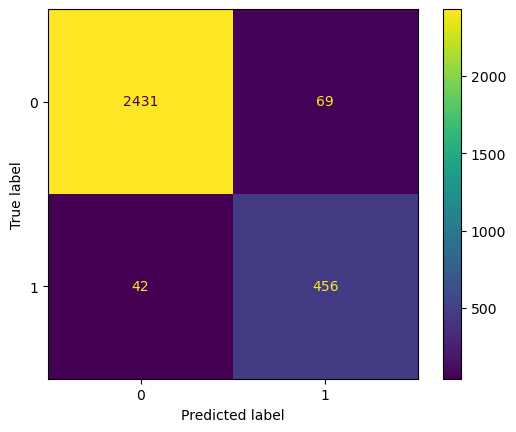

In [85]:
# Plotting a confusion matrix to visualuise how well randomforest2 predicts on test set 

# Generate array of values for confusion matrix
preds = rf2.best_estimator_.predict(X_test)
cm = confusion_matrix(y_test, preds, labels=rf2.classes_)

# Plot confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                             display_labels=rf2.classes_)
disp.plot(values_format='');

**Decision Tree Splits**

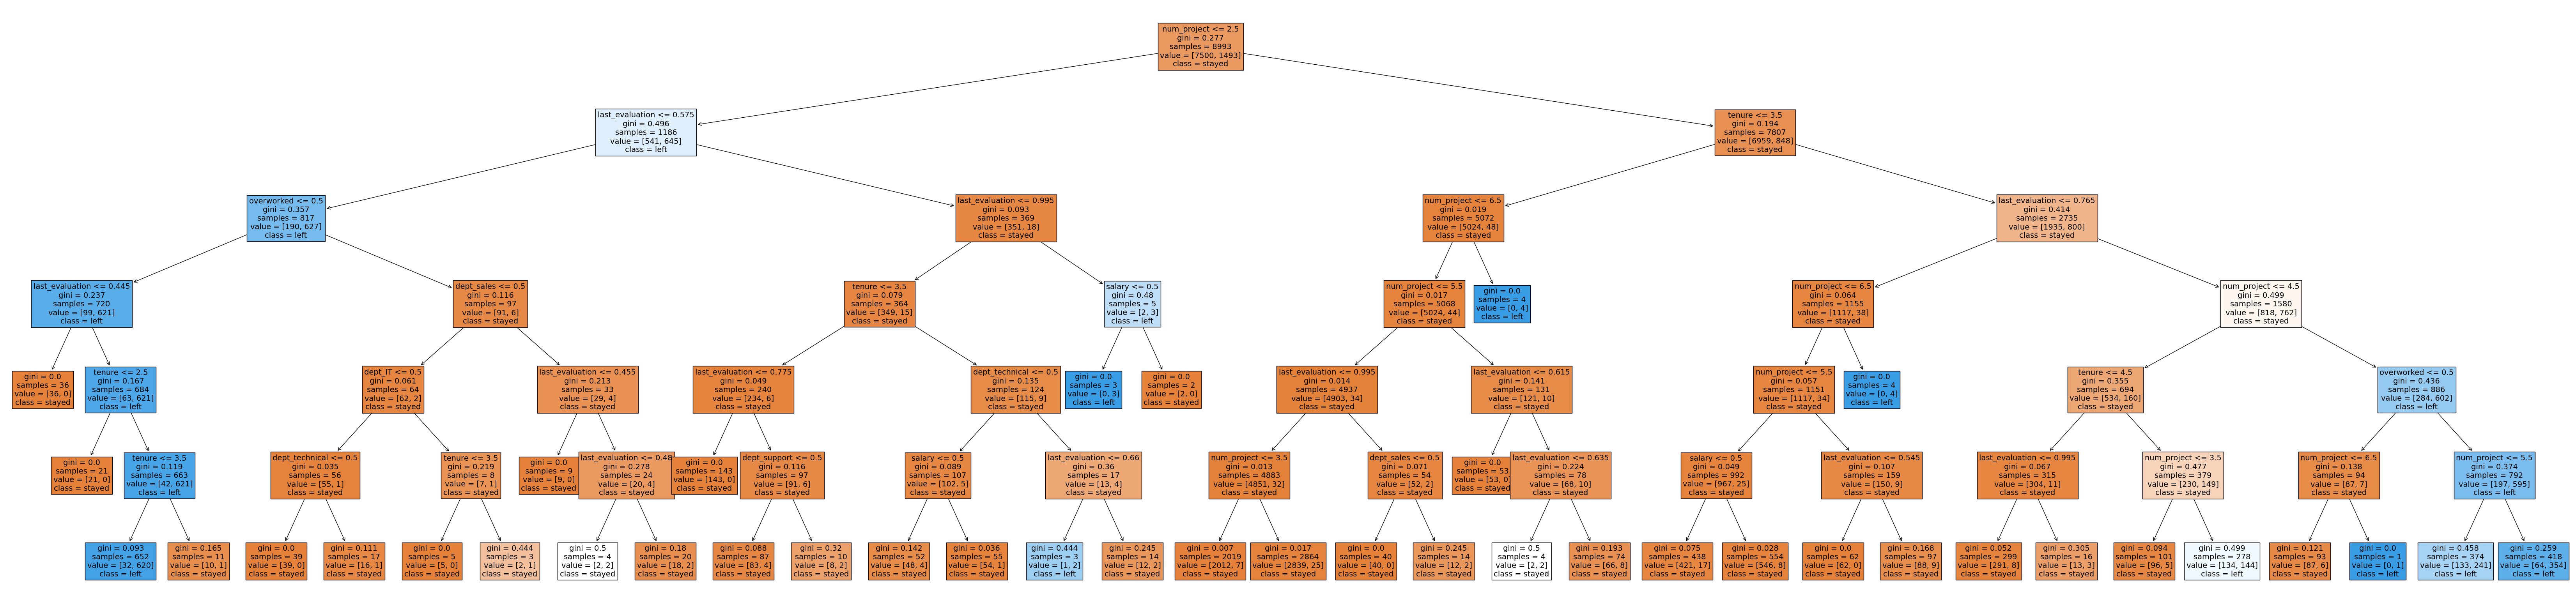

In [86]:
plt.figure(figsize=(85,20))
plot_tree(tree2.best_estimator_, max_depth=6, fontsize=14, feature_names=X.columns, 
          class_names={0:'stayed', 1:'left'}, filled=True);
plt.show()

**Decision Tree Feature Importance**

In [87]:
#tree2_importances = pd.DataFrame(tree2.best_estimator_.feature_importances_, columns=X.columns)
tree2_importances = pd.DataFrame(tree2.best_estimator_.feature_importances_, 
                                 columns=['gini_importance'], 
                                 index=X.columns
                                )
tree2_importances = tree2_importances.sort_values(by='gini_importance', ascending=False)

# Only extract the features with importances > 0
tree2_importances = tree2_importances[tree2_importances['gini_importance'] != 0]
tree2_importances

gini_importance
num_project             0.343930
last_evaluation         0.335089
tenure                  0.213517
overworked              0.104462
salary                  0.001610
dept_technical          0.000630
dept_sales              0.000434
dept_support            0.000238
dept_IT                 0.000090

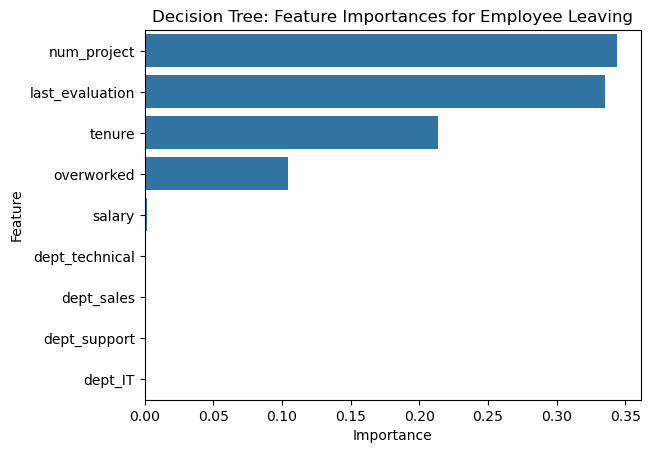

In [88]:
# Creating a barplot to visualise the data

sns.barplot(data=tree2_importances, x="gini_importance", y=tree2_importances.index, orient='h')
plt.title("Decision Tree: Feature Importances for Employee Leaving", fontsize=12)
plt.ylabel("Feature")
plt.xlabel("Importance")
plt.show()

The barplot above shows that in this decision tree model, `last_evaluation`, `number_project`, `tenure`, and `overworked` have the highest importance, in that order. These variables are most helpful in predicting the outcome variable, `left`.

**Random Forest Feature Importance**

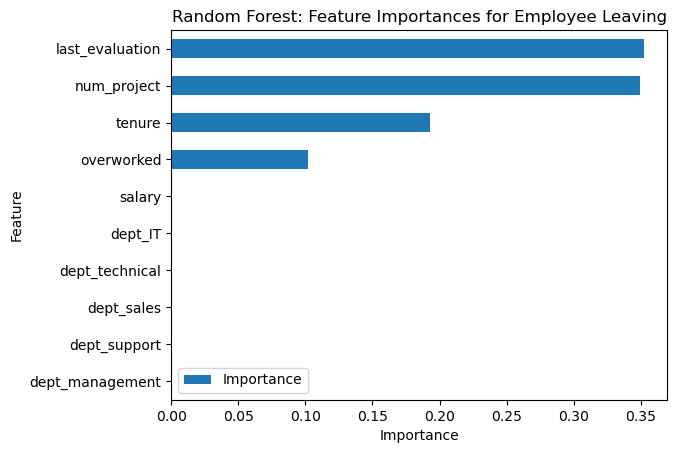

In [89]:
# Get feature importances
feat_impt = rf2.best_estimator_.feature_importances_

# Get indices of top 10 features
ind = np.argpartition(rf2.best_estimator_.feature_importances_, -10)[-10:]

# Get column labels of top 10 features 
feat = X.columns[ind]

# Filter `feat_impt` to consist of top 10 feature importances
feat_impt = feat_impt[ind]

y_df = pd.DataFrame({"Feature":feat,"Importance":feat_impt})
y_sort_df = y_df.sort_values("Importance")
fig = plt.figure()
ax1 = fig.add_subplot(111)

y_sort_df.plot(kind='barh',ax=ax1,x="Feature",y="Importance")

ax1.set_title("Random Forest: Feature Importances for Employee Leaving", fontsize=12)
ax1.set_ylabel("Feature")
ax1.set_xlabel("Importance")

plt.show()

The plot above shows that in this random forest model, `last_evaluation`, `number_project`, `tenure`, and `overworked` have the highest importance, in that order. These variables are most helpful in predicting the outcome variable, `left`, and they are the same as the ones used by the decision tree model.

### Summary of model results

**Logistic Regression**

The logistic regression model achieved precision of 79%, recall of 82%, f1-score of 80% (all weighted averages), and accuracy of 82%, on the test set.

**Tree-based Machine Learning**

After conducting feature engineering, the randomforest model achieved AUC of 96.7%, precision of 85.3%, recall of 88.6%, f1-score of 86.9%, and accuracy of 95.6%, on the test set. The random forest modestly outperformed the decision tree model. 

### Conclusion, Recommendations, Next Steps

The models and the feature importances extracted from the models confirm that employees at the company are overworked. 

To retain employees, the following recommendations could be presented to the stakeholders:

* Cap the number of projects that employees can work on.
* Consider promoting employees who have been with the company for atleast four years, or conduct further investigation about why four-year tenured employees are so dissatisfied. 
* Either reward employees for working longer hours, or don't require them to do so. 
* If employees aren't familiar with the company's overtime pay policies, inform them about this. If the expectations around workload and time off aren't explicit, make them clear. 
* Hold company-wide and within-team discussions to understand and address the company work culture, across the board and in specific contexts. 
* High evaluation scores should not be reserved for employees who work 200+ hours per month. Consider a proportionate scale for rewarding employees who contribute more/put in more effort. 

**Next Steps**

It may be justified to still have some concern about data leakage. It could be prudent to consider how predictions change when `last_evaluation` is removed from the data. It's possible that evaluations aren't performed very frequently, in which case it would be useful to be able to predict employee retention without this feature. It's also possible that the evaluation score determines whether an employee leaves or stays, in which case it could be useful to pivot and try to predict performance score. The same could be said for satisfaction score. 

We could try building a K-means model on this data and analyzing the clusters. This may yield valuable insight. 